사용일자       object
노선명        object
역명         object
승차총승객수    float64
하차총승객수    float64
등록일자      float64
dtype: object
조회역 입력: 선릉


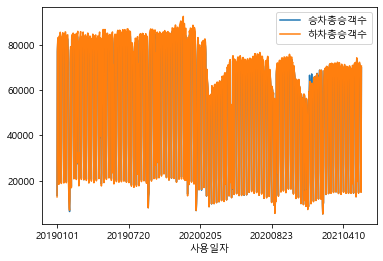

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv

import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)


def Csv_reset(fn):
    f = open('./subway/'+fn, encoding='utf-8')
    data = csv.reader(f)
    # "사용일자"', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자'

    next(data)
    data_lst = []
    for row in data:
        data_lst.append(row[:6])

    df = pd.DataFrame(data_lst, columns=['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자'])
    df.to_csv('./subway/'+fn, encoding='cp949', index=False)
    f.close()

def file_read():
    ### subway 폴더에 있는 모든 파일 하나로 만들기
    filePath='./subway/'
    fileName=os.listdir(filePath)  # subway 폴더의 모든 파일 및 하위 폴더 정보를 리스트형으로 가져와 저장

    df1=pd.DataFrame()

    for fn in fileName:
        ### try ~ except : 예외처리 구문
        #print(fn)
        try:   # 정상코드 수행
            df2=pd.read_csv(filePath+fn, encoding='cp949')
        except: # try 구문에서 에러 발생시 처리하기 위한 구문
            Csv_reset(fn)
            df2 = pd.read_csv(filePath + fn, encoding='cp949')
        # 데이터 한개의 파일로 만들기
        df1=pd.concat([df1, df2])
    
    df1=df1.reset_index(drop=True)
    
    return df1


def subway_sch(dfdata, subway_name):
    df2=dfdata[dfdata['역명']==subway_name]
    #print(df2)
    df2.plot(x='사용일자', y='승차총승객수')
    plt.show()

def subway_sch(dfdata, subway_name):
    df2=dfdata[dfdata['역명']==subway_name]
    #print(df2.info())
    df2 = df2.astype({'승차총승객수': 'int64','사용일자':'str'})
    df2=df2.groupby(by='사용일자')['승차총승객수'].sum()
    df2.plot()
    #df2=df2.groupby(by='사용일자')['하차총승객수'].sum()
    #df2.plot()
    plt.show()
    
### 사용자 함수 호출 부분
df1=file_read()
#print(df1.head())
#print(df1.tail())

#print(df1.dtypes)

subway_name=input('조회역 입력: ')
df2=subway_sch(df1, subway_name)